In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Travel_scrape.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hotel          8051 non-null   object 
 1   Room Type      8051 non-null   object 
 2   Rate           8051 non-null   object 
 3   Check-in Date  8051 non-null   object 
 4   Search Date    8051 non-null   object 
 5   Search Time    8051 non-null   object 
 6   Unnamed: 6     0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 440.4+ KB


In [4]:
df.isnull().sum()

Hotel               0
Room Type           0
Rate                0
Check-in Date       0
Search Date         0
Search Time         0
Unnamed: 6       8051
dtype: int64

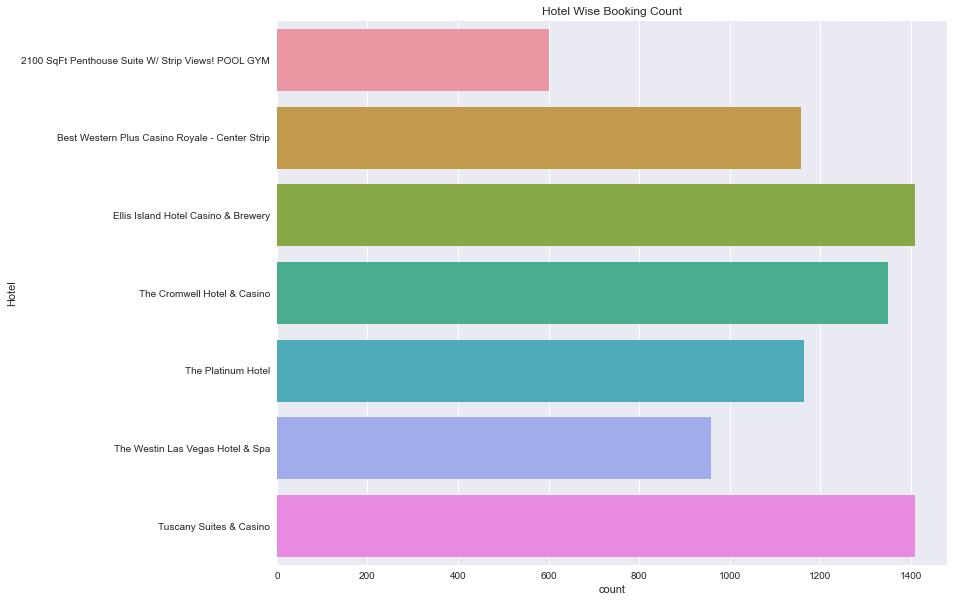

In [5]:
plt.figure(figsize=(12,10))
sns.countplot(y='Hotel',data=df)
plt.title('Hotel Wise Booking Count')
plt.show()

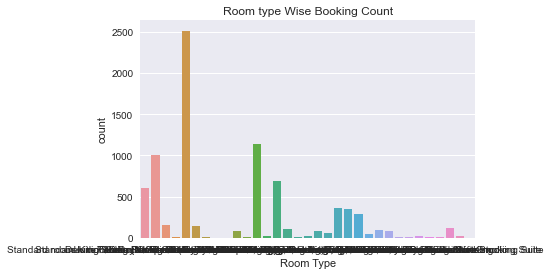

In [6]:
sns.countplot(x='Room Type' , data= df)
plt.title('Room type Wise Booking Count')
plt.show()

In [7]:
df = df.drop('Unnamed: 6', axis=1)
df.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,0:00:00
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,1:00:00
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,2:00:00
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,3:00:00
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,4:00:00


In [8]:
# df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
# df['Search Date'] = pd.to_datetime(df['Search Date'])

In [9]:
# df['Date_gap'] = df['Check-in Date'] - df['Search Date']
# df['Date_gap'] = df['Date_gap'].astype(str)
# df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)

# # Remove $ mark in Rate Column
# df['Rate'] = df['Rate'].apply(lambda x: x[3:])
# df.head()

In [10]:
df1 = df.copy()

In [11]:
df1.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,0:00:00
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,1:00:00
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,2:00:00
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,3:00:00
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,4:00:00


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split


In [13]:
for i in df1.select_dtypes('object').columns:
    encoder = LabelEncoder()
    df1[i] = encoder.fit_transform(df1[i])

In [14]:
# Check the Correlation with "Rate" column to other columns

In [15]:
df.tail()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
8046,Tuscany Suites & Casino,Executive Suite,US$121,2022-08-20,2022-08-07,21:00:00
8047,Tuscany Suites & Casino,Executive Suite,US$139,2022-08-20,2022-08-07,22:00:00
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,US$168,2022-08-20,2022-08-07,23:00:00
8049,Tuscany Suites & Casino,Executive Suite,US$143,2022-08-20,2022-08-08,0:00:00
8050,Tuscany Suites & Casino,Executive Double Room,US$147,2022-08-20,2022-08-08,0:00:00


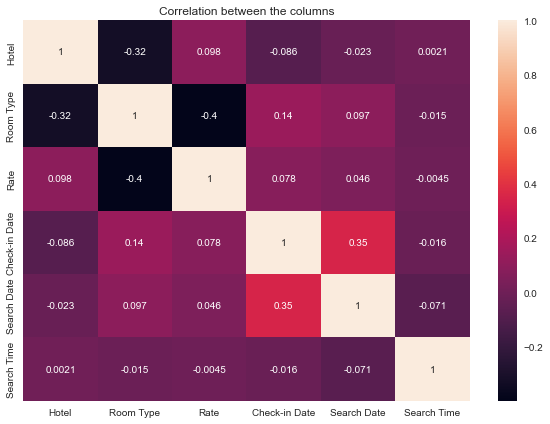

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [18]:
df1.corr()['Rate'].sort_values()

Room Type       -0.398470
Search Time     -0.004465
Search Date      0.046234
Check-in Date    0.077944
Hotel            0.097931
Rate             1.000000
Name: Rate, dtype: float64

In [20]:
df1.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,0,24,85,0,0,0
1,0,24,85,0,0,11
2,0,24,85,0,0,16
3,0,24,85,0,0,17
4,0,24,85,0,0,18


<AxesSubplot:title={'center':'Correlation between Hotel & Rate'}, xlabel='Hotel', ylabel='Rate'>

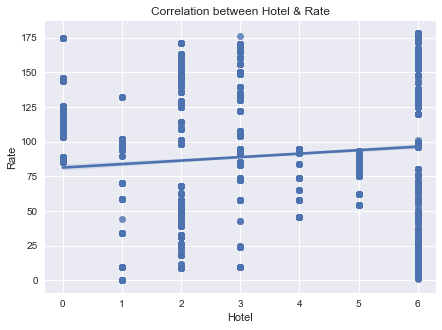

In [18]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Hotel & Rate')
sns.regplot(x='Hotel', y='Rate', data=df1 )

In [19]:
x= df1.drop('Rate' , axis=1)
y= df1['Rate']

In [20]:
print("Shape of x is :", x.shape)
print("Shape of y is :", y.shape)

Shape of x is : (8051, 5)
Shape of y is : (8051,)


In [21]:
# Split train test set 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
print('Shape of x_train is: ', x_train.shape)
print('Shape of x_test is: ', x_test.shape)
print('Shape of y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of x_train is:  (5635, 5)
Shape of x_test is:  (2416, 5)
Shape of y_train is:  (5635,)
Shape of y_test is:  (2416,)


In [24]:
scaler = StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Linear Regression

In [26]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

In [27]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of Linear Regression model is : ", linreg_mae)
print("R2 Score of Linear Regression model is : ", linreg_r2)

MAE of Linear Regression model is :  37.98673285167967
R2 Score of Linear Regression model is :  0.19791338625987598


In [28]:
linreg_score = cross_val_score(linreg, x_test, y_test, cv=4)
print("Linear regression Model Accuuracy is: {}".format(linreg_score.mean()*100))

Linear regression Model Accuuracy is: 18.968192954650863


### Decision Tree

In [29]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [30]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test,dtree_pred)
print("MAE of Decision tree model is : ", dtree_mae)
print("R2 score of Decision tree model is : ", dtree_r2)

MAE of Decision tree model is :  1.8385761589403973
R2 score of Decision tree model is :  0.9274765615495774


In [31]:
dtree_score = cross_val_score(dtree, x_test, y_test, cv=4)
print("Decision tree Model Accuuracy is: {}".format(dtree_score.mean()*100))

Decision tree Model Accuuracy is: 91.17178195212328


## XGBoost  - Gradient Boost

In [32]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [33]:
xgb_mae = mean_absolute_error(y_test, dtree_pred)
xgb_r2 = r2_score(y_test,dtree_pred)
print("MAE of xgboost model is : ", xgb_mae)
print("R2 score of xgboost model is : ", xgb_r2)

MAE of xgboost model is :  1.8385761589403973
R2 score of xgboost model is :  0.9274765615495774


In [38]:
xgb_score = cross_val_score(xgb, x_test, y_test, cv=4)
print("XGBoost Model Accuuracy is: {}".format(xgb_score.mean()*100))

XGBoost Model Accuuracy is: 91.79841945437647


In [35]:
df1.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,0,24,85,0,0,0
1,0,24,85,0,0,11
2,0,24,85,0,0,16
3,0,24,85,0,0,17
4,0,24,85,0,0,18


In [36]:
data = {'Hotel':0,'Room Type':24,'Check-in Date':0,'Search Date':0,'Search Time':12}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,Hotel,Room Type,Check-in Date,Search Date,Search Time
0,0,24,0,0,12


In [37]:
new_pred = xgb.predict(new_df)
print('The Booking price is: ',new_pred)

The Booking price is:  [68.86803]
